## MQTT 連線以及 mosquitto 設定流程

#### 1. 先下載 MQTT 伺服器 mosquitto

進入網址 https://mosquitto.org/download/ 後選擇 64 位元版本下載

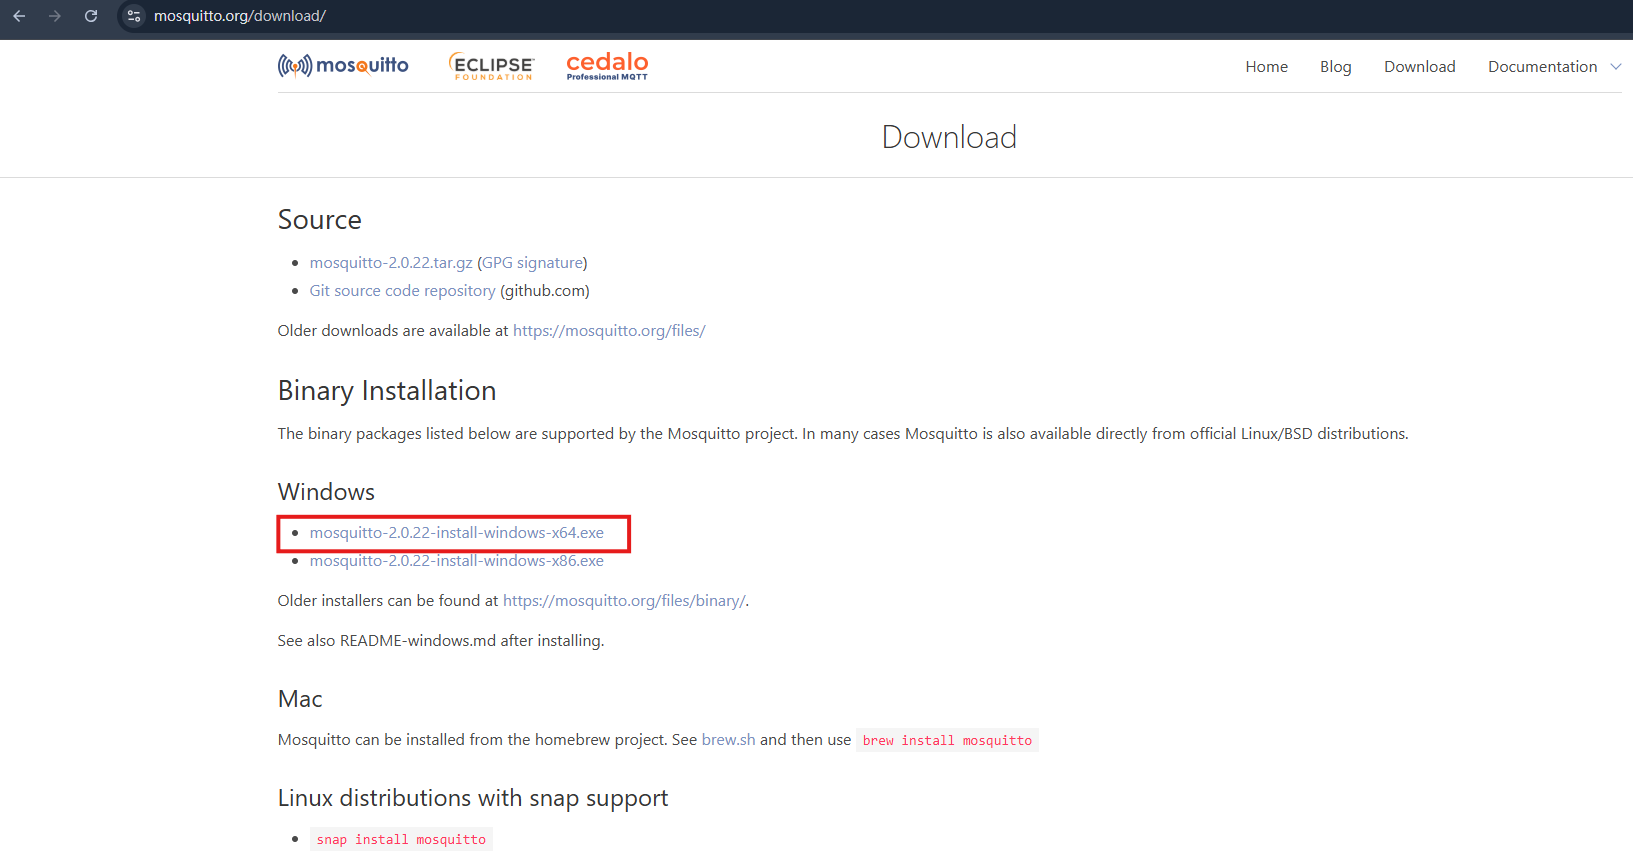

#### 2. 使用 MQTT 前需要先到防火牆設定，新增規則以允許電腦啟用 MQTT 服務

(1) 搜尋「控制台」開啟控制台介面，開啟「系統及安全性」

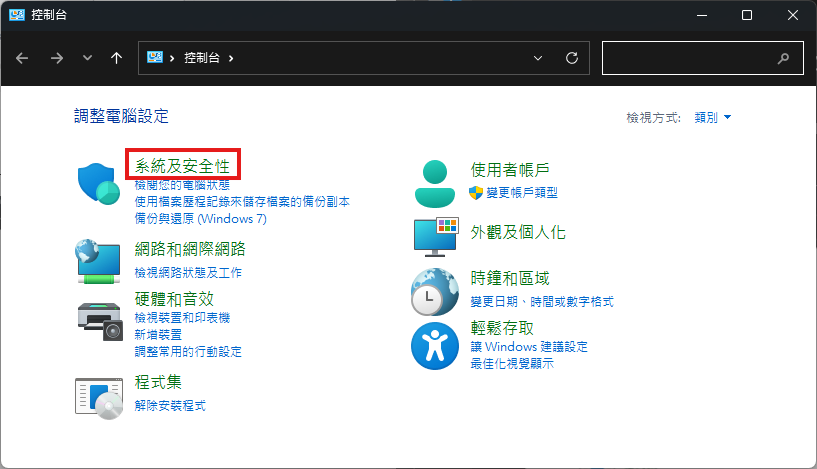

(2) 開啟「Windows Defender防火牆」

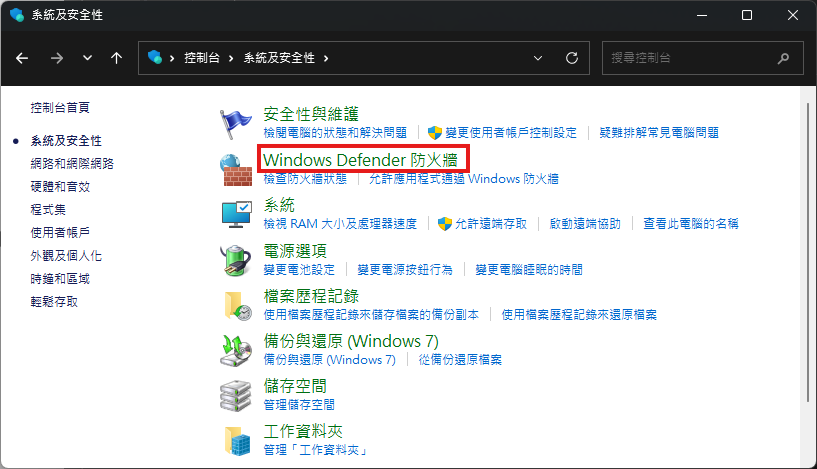

(3) 選擇「進階設定」

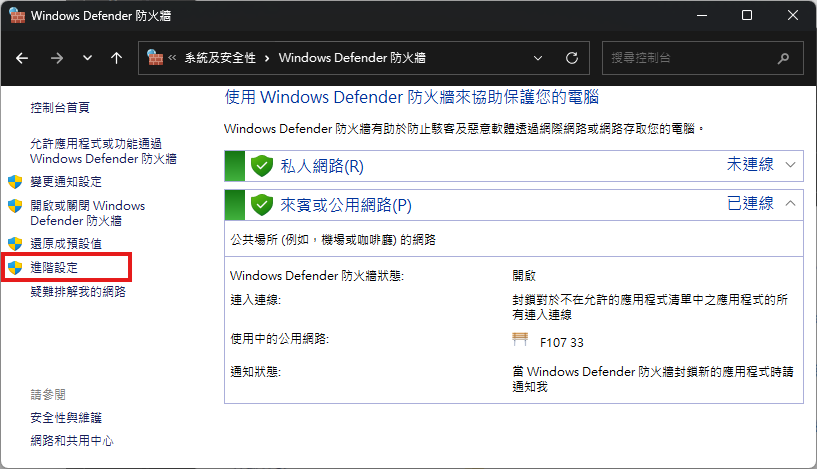

(4) 選擇「輸入規則」後按下「新增規則」

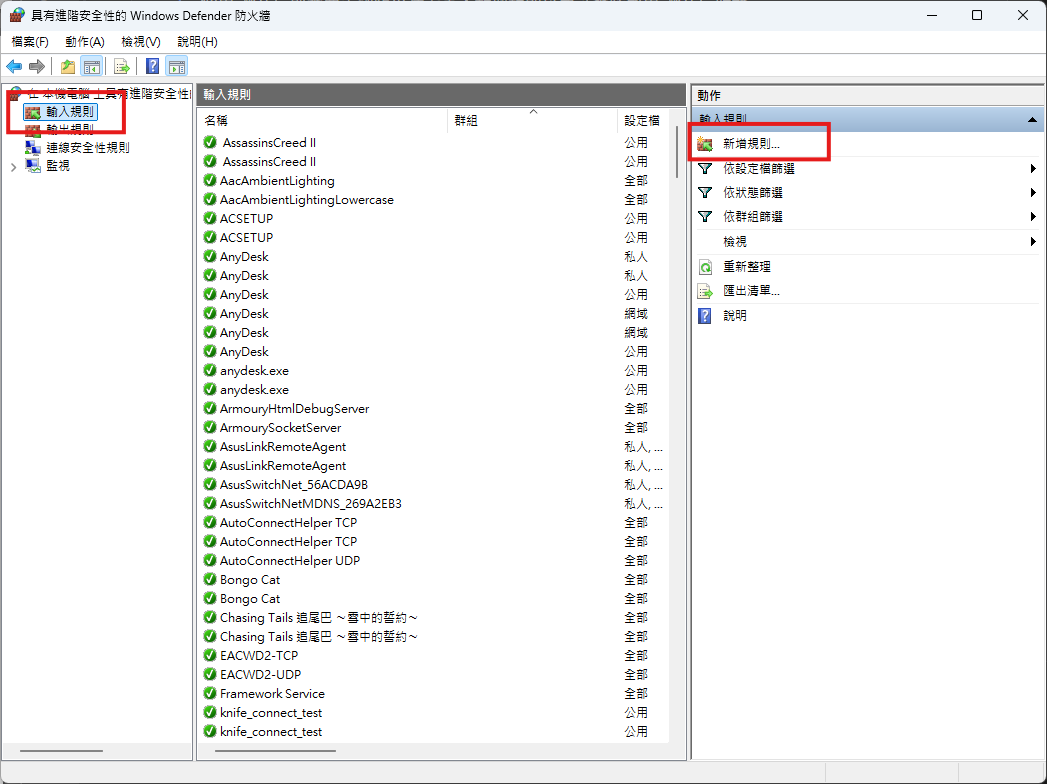

(5) 選擇連接埠

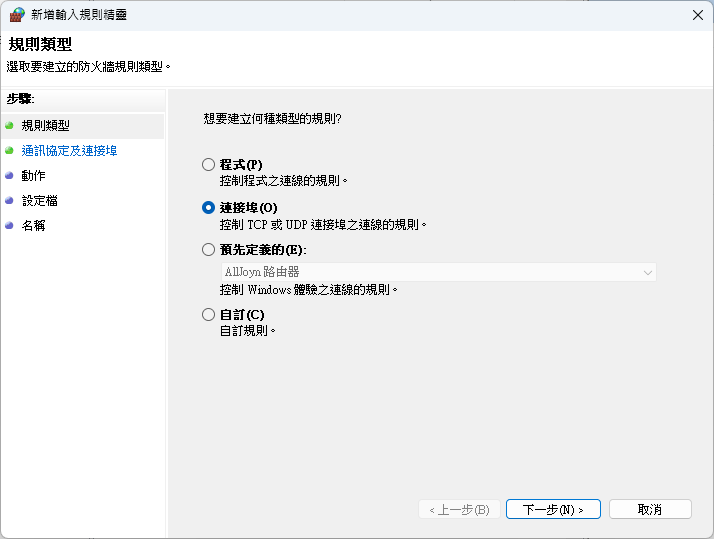

(6) 選擇TCP連線協定以及在特定本機連接埠輸入 1883

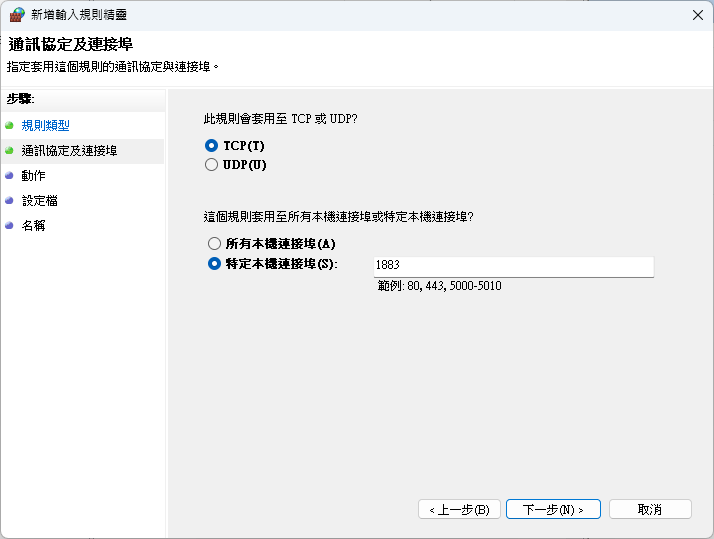

(7) 選擇允許連線

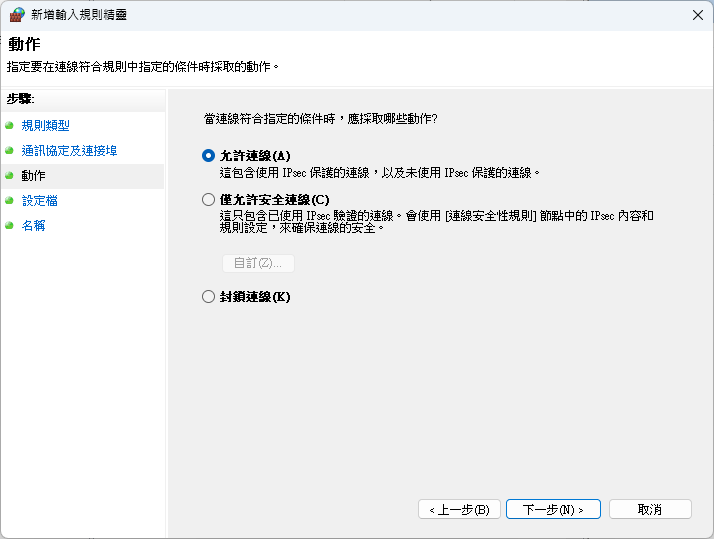

(8) 選擇網域、私人、公用

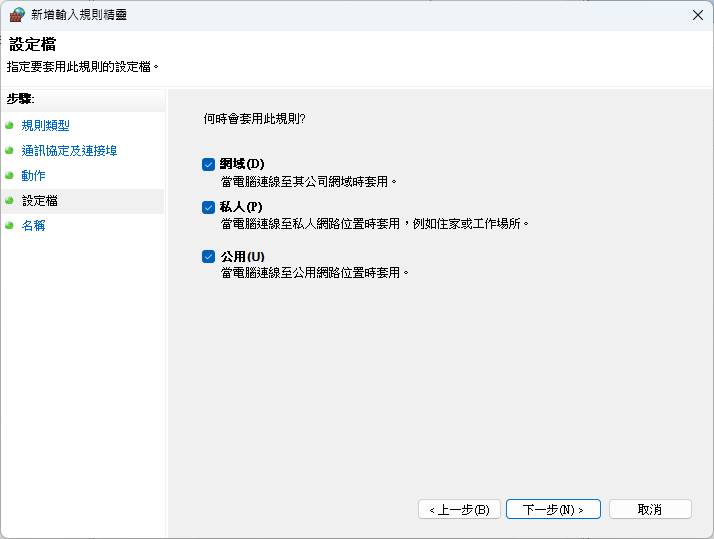

(9) 填好名稱後，完成輸出 Port 1883 的規則

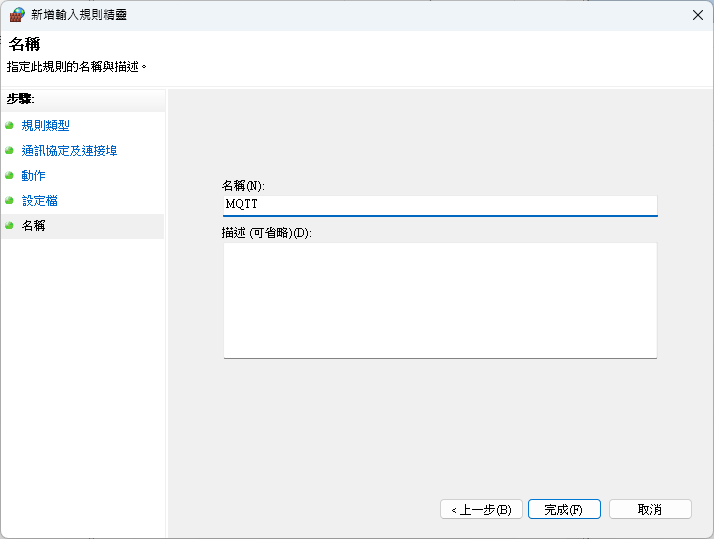


#### 3. 修改 mosquito 的設定檔，允許對外連線

(1) 搜尋「記事本」右鍵點選「以系統管理員身分執行」點選「檔案」然後點選「開啟」

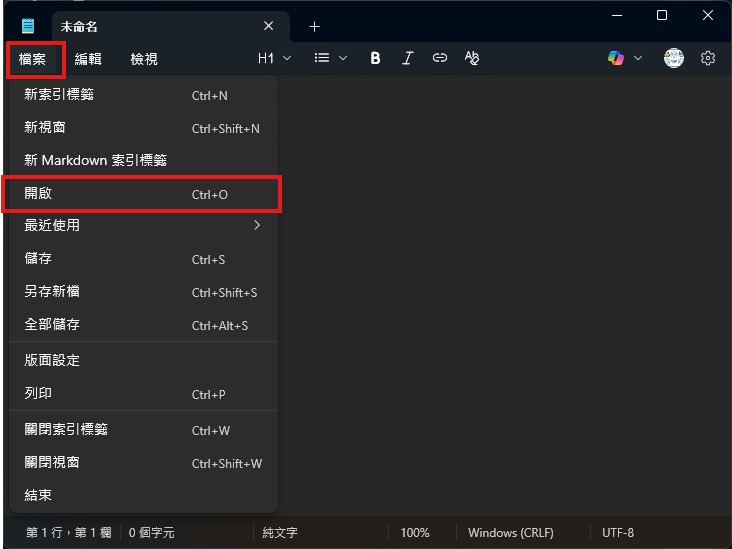

(2) 找到路徑「C:\Program Files\mosquitto\」後選擇「所有檔案 (*.*)」

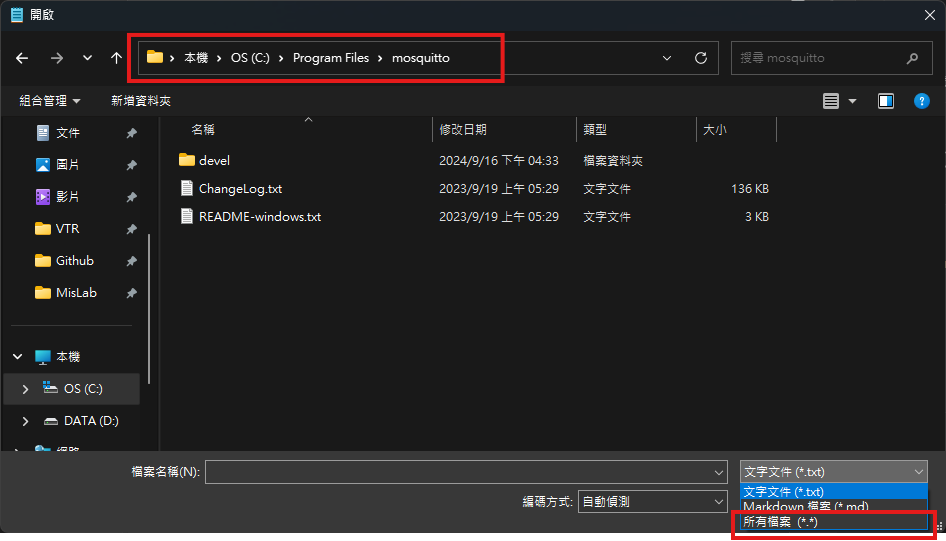

(3) 點選「mosquitto.conf」

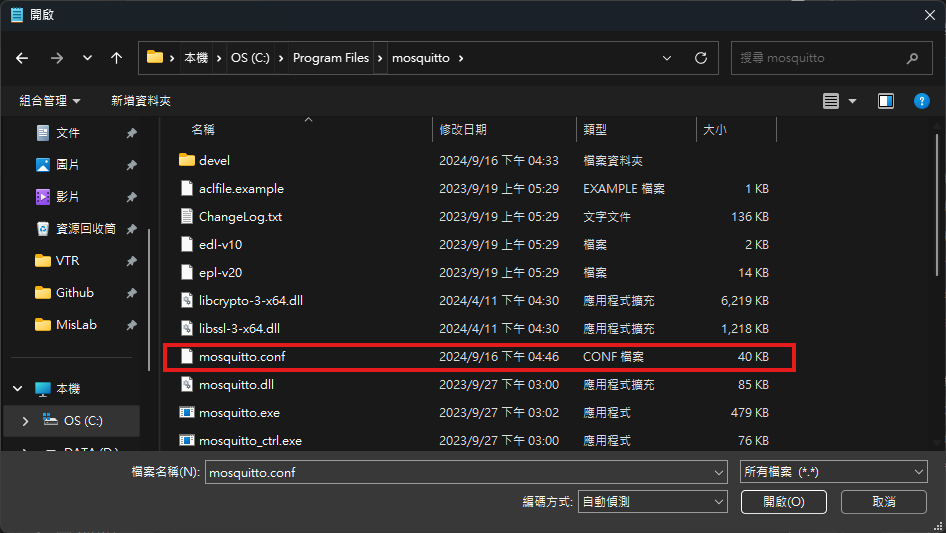

(4) 在第一行加入「listener 1883」以及「allow_anonymous true」後儲存檔案

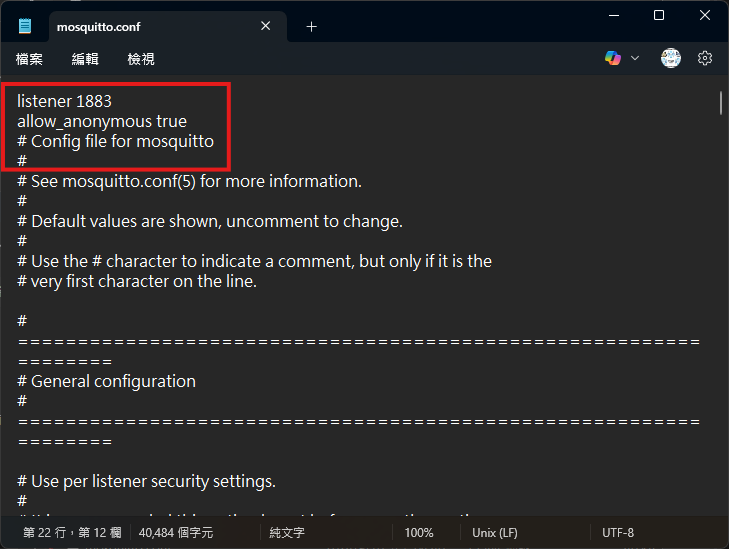

(5) 搜尋「cmd」右鍵點選「以系統管理員身分執行」輸入「net stop mosquitto」以及「net start mosquitto」 重新啟動 mosquitto 服務

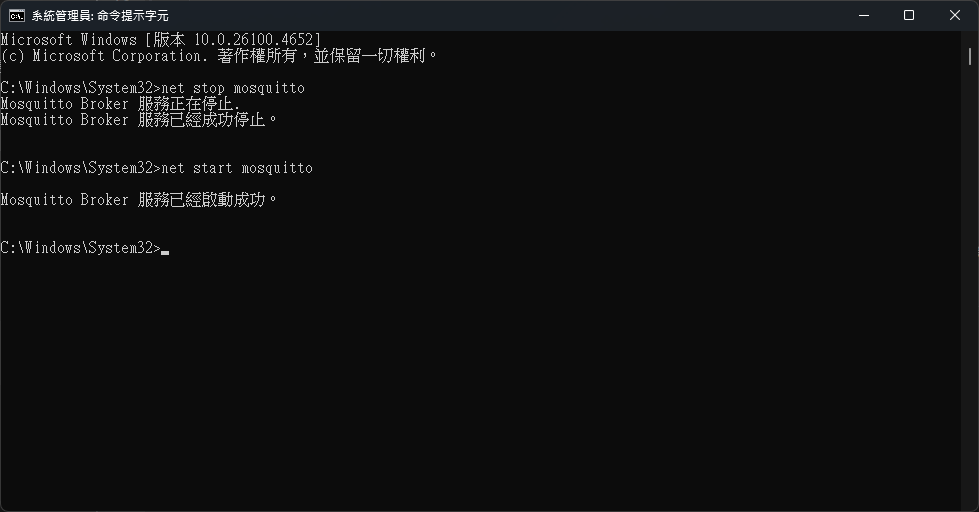

(6)輸入「netstat -an | find "1883"」確認設定正確

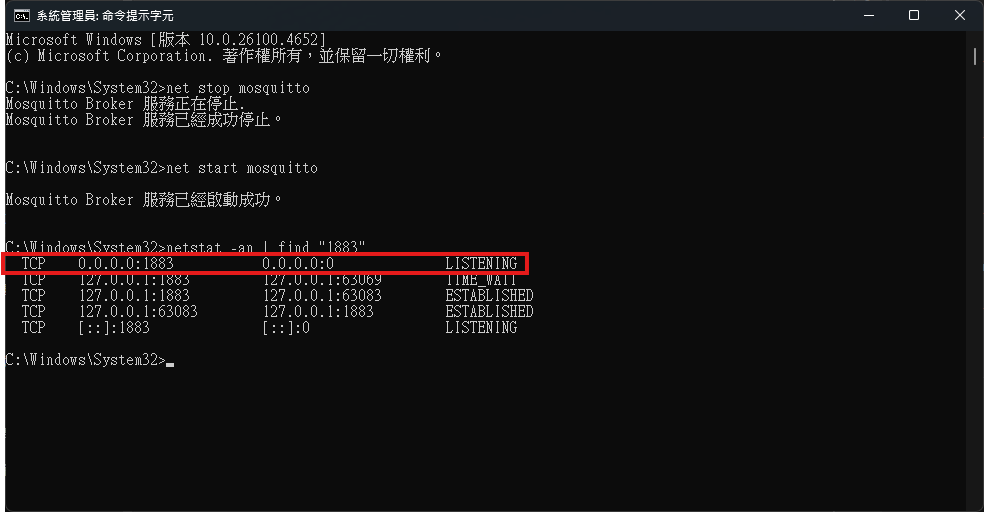

#### 4. 使用 python 程式確認能否連線

In [ ]:
import paho.mqtt.client as mqtt

broker_ip = "10.0.0.94"  # 替換為 mosquitto 所在電腦 IP
port = 1883

client = mqtt.Client()

try:
    client.connect(broker_ip, port, 60)
    print("連線成功")
except Exception as e:
    print("連線失敗：", e)


#### 5. Windows 防火牆開啟 ping 請求

Windows 預設會阻擋來自其他主機的 ping（ICMP）請求，不會影響 MQTT 通訊但會影響對方用 ping 測試連線。

(1) 搜尋「cmd」輸入「netsh advfirewall firewall add rule name="允許 ICMPv4 回應" protocol=icmpv4:8,any dir=in action=allow」新增防火牆規則，允許他人 ping 自己電腦

(2) 如果需要刪除規則輸入「netsh advfirewall firewall delete rule name="允許 ICMPv4 回應"」


作者: 洪凱哲

日期: 2025/07/16